# Analysis of liked Spotify songs

### Import needed packages

In [4]:
import pandas as pd
import numpy as np
import json
import os


import spotipy
from spotipy.oauth2 import SpotifyOAuth
import sys
import spotipy_func as spf
from plot_func import *

import seaborn as sns
import matplotlib.pyplot as plt

### Set up API

In [5]:
sp = spf.load_spotify_client(config_path = 'config.json')

### Collect and process data
If a lot of songs are analysed this might take a while

In [6]:
# Get all liked songs features. To get the songs of a specific playlist, use the playlist id (e.g. from get_my_playlists())
tracks          = spf.get_tracks(sp, playlist_id = None)
track_ids       = spf.extract_track_ids(sp, tracks)
audio_features  = spf.get_audio_features(sp, track_ids)

# Extract only the interesting features. If more are needed the can be specified in the extra_infos list
# extra_infos     = ["[track][album][album_type]"]
track_infos     = spf.merge_track_details_and_features(tracks, audio_features, extra_track_info = [])
track_infos['added_at'] = pd.to_datetime(track_infos['added_at'])

In [7]:
# Choose only some interessting columns
num_col = ['valence', 'popularity', 'danceability', 'liveness']

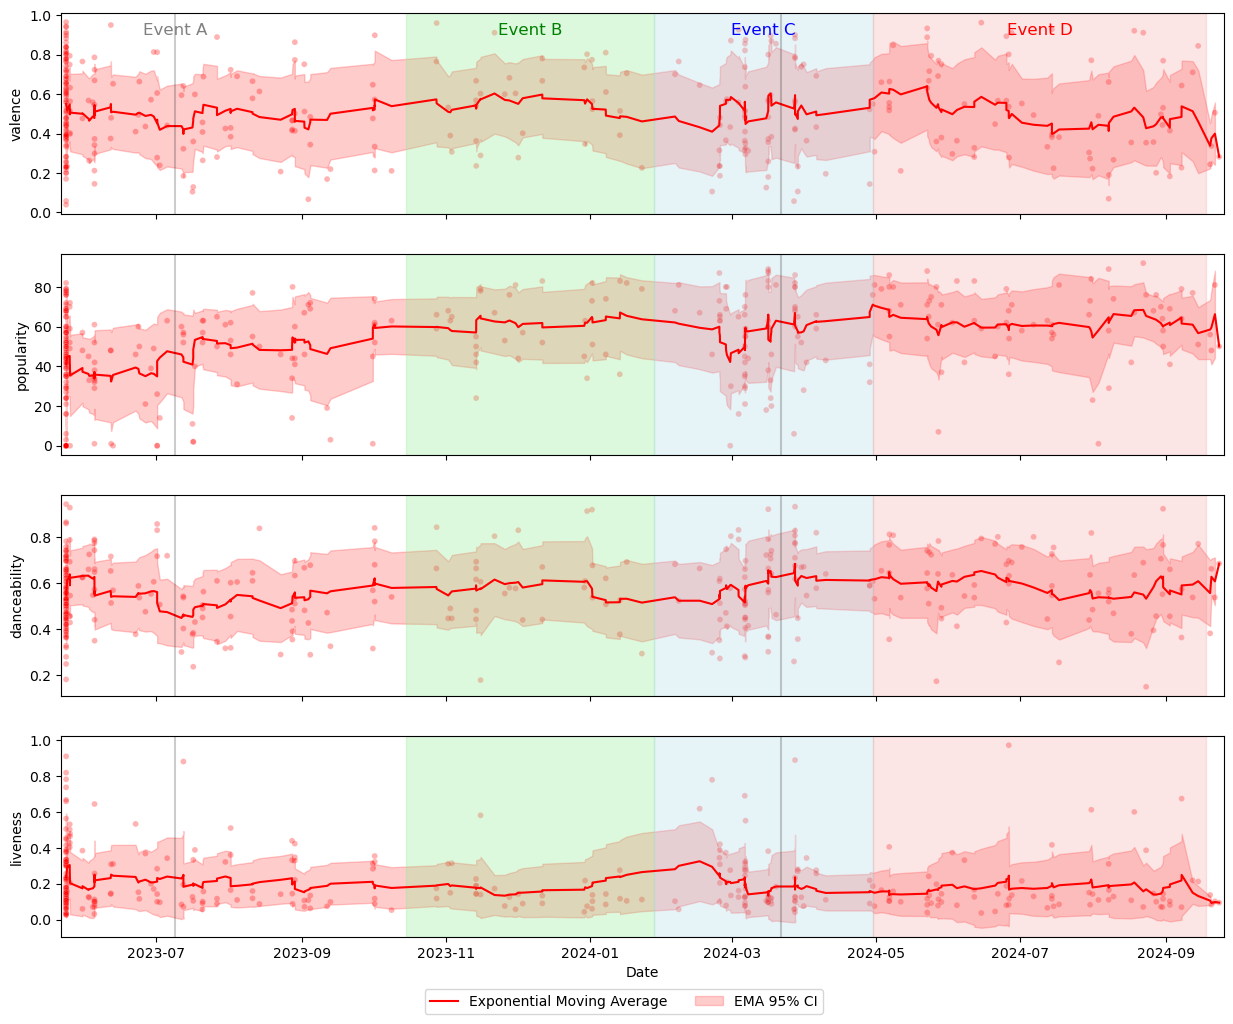

In [10]:
# Create subplots
fig, ax = plt.subplots(figsize=[15, 3*len(num_col)], nrows=len(num_col) ,sharex= True)

# Define start and end of the date range for shading
EventA         = pd.to_datetime('2023-07-09')
EventB_start = pd.to_datetime('2023-10-15')
EventB_end   = pd.to_datetime('2024-01-28')
EventX           = pd.to_datetime('2024-03-22')
EventC_end  = pd.to_datetime('2024-04-30')
today           = pd.to_datetime('2024-09-18')

# Adjust x-axis limits
min_date = track_infos['added_at'].min() - pd.Timedelta(days = 2)  # Min date - 1 day
max_date = track_infos['added_at'].max() + pd.Timedelta(days = 2)  # Max date + 1 day

for ind, col in enumerate(num_col):
    sns.scatterplot(data    = track_infos, 
                    x       = 'added_at', 
                    y       = col, 
                    ax      = ax[ind], 
                    color   = 'red', 
                    size    = 5, 
                    alpha   = 0.3, 
                    legend  = False)
    
    ema(track_infos, col, ax[ind], span = 20)    

    # Add shaded areas and vertical lines
    ax[ind].axvspan(EventB_start, EventB_end, color='lightgreen', alpha=0.3)
    ax[ind].axvspan(EventB_end, EventC_end, color='lightblue', alpha=0.3)
    ax[ind].axvspan(EventC_end, today, color='lightcoral', alpha=0.2)
    ax[ind].axvline(EventA, color = 'black', alpha = 0.2)
    ax[ind].axvline(EventX, color = 'black', alpha = 0.2)


    # Set x-axis limits
    ax[ind].set_xlim([min_date, max_date])

    # Add legend
    #ax[ind].legend()
    

# Add text for events
add_middle_text(EventA, EventA, 'Event A', 'gray', ax[0])
add_middle_text(EventB_start, EventB_end, 'Event B', 'green', ax[0])
add_middle_text(EventB_end, EventC_end, 'Event C', 'blue', ax[0])
add_middle_text(EventC_end, today, 'Event D', 'red', ax[0])

# Set common x-axis labels and format date labels
ax[-1].set_xlabel('Date')

# Add a single legend at the bottom of the figure
handles, labels = ax[ind].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.04), ncol=3, fontsize=10)

plt.show()
